In [28]:
import pandas as pd

In [29]:
df = pd.read_csv("undersampled_2022.csv")
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-591999,Source3,1,2022-06-16 08:38:47,2022-06-16 09:08:03,32.816841,-96.818459,0.000,Crash on Hawthorne Ave at Cedar Springs Rd.,Hawthorne Ave,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-592161,Source2,1,2022-06-16 06:50:42,2022-06-16 07:20:05,36.187565,-95.895630,0.000,Crash on OK-11 Eastbound at Airport Dr.,Gilcrease Expy W,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-602981,Source2,1,2022-06-06 06:13:28,2022-06-06 06:57:47,35.139935,-81.232735,0.000,Crash on Barrett Rd at Colonial Rd.,Barrett Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-635975,Source2,1,2022-04-27 16:34:30,2022-04-27 18:04:13,34.937599,-82.139420,0.000,Crash on Moore St at SC-290 Main St.,N Moore St,...,False,False,True,False,False,False,Day,Day,Day,Day
4,A-513736,Source2,1,2022-09-07 12:58:59,2022-09-07 13:27:57,35.598080,-97.501900,0.320,Crash on exit ramp from Broadway Extension Hwy...,John Kilpatrick Tpke,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143515,A-4349121,Source1,4,2022-07-11 17:17:00,2022-07-11 20:15:00.000000000,37.840137,-87.021787,0.752,Eastbound lanes blocked at the 7900 block. Veh...,US-60,...,False,False,False,False,False,False,Day,Day,Day,Day
143516,A-3857438,Source1,4,2022-07-16 17:18:20,2022-07-16 21:45:21,38.449045,-78.855192,0.029,Incident on US-33 WB near US-33 Road closed. T...,E Market St,...,False,False,False,False,False,False,Day,Day,Day,Day
143517,A-4366147,Source1,4,2022-11-11 15:49:44,2022-11-11 17:11:13.000000000,32.149034,-90.278207,0.377,Incident on I-55 NB near WYNNDALE RD Road clos...,I-55 N,...,False,False,False,False,False,False,Day,Day,Day,Day
143518,A-5186401,Source1,4,2022-05-11 16:20:06,2022-05-11 17:37:04,34.697589,-91.145905,0.029,Incident on US-79 EB near US-79 Road closed. T...,Highway 79,...,False,False,False,False,False,False,Day,Day,Day,Day


In [30]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [31]:
df.iloc[0]

ID                                                          A-591999
Source                                                       Source3
Severity                                                           1
Start_Time                                       2022-06-16 08:38:47
End_Time                                         2022-06-16 09:08:03
Start_Lat                                                  32.816841
Start_Lng                                                 -96.818459
Distance(mi)                                                     0.0
Description              Crash on Hawthorne Ave at Cedar Springs Rd.
Street                                                 Hawthorne Ave
City                                                          Dallas
County                                                        Dallas
State                                                             TX
Zipcode                                                        75219
Country                           

In [32]:
nan_columns = df.columns[df.isna().any()]
print("有缺值的欄位：", nan_columns.tolist())

# 計算每個有缺值欄位的缺值數量
nan_counts = df[nan_columns].isna().sum()
print("各欄位缺值數量：")
print(nan_counts)

有缺值的欄位： []
各欄位缺值數量：
Series([], dtype: float64)


In [33]:
import pandas as pd

# 1. 去除有 NaN 的列（針對整張表，也可改針對特定欄位）
df_clean = df

# 2. 確保時間欄位是 datetime 型態
df_clean['Start_Time'] = pd.to_datetime(df_clean['Start_Time'])
df_clean['End_Time'] = pd.to_datetime(df_clean['End_Time'], errors='coerce', infer_datetime_format=True)
df_clean['Weather_Timestamp'] = pd.to_datetime(df_clean['Weather_Timestamp'])

# 3. 從時間欄位拆出小時與分鐘
df_clean['Start_Hour'] = df_clean['Start_Time'].dt.hour
df_clean['Start_Minute'] = df_clean['Start_Time'].dt.minute

df_clean['End_Hour'] = df_clean['End_Time'].dt.hour
df_clean['End_Minute'] = df_clean['End_Time'].dt.minute

df_clean['Weather_Hour'] = df_clean['Weather_Timestamp'].dt.hour
df_clean['Weather_Minute'] = df_clean['Weather_Timestamp'].dt.minute

# 4. 檢查結果
print(df_clean[['Start_Time', 'Start_Hour', 'Start_Minute', 'End_Time', 'End_Hour', 'End_Minute', 'Weather_Timestamp', 'Weather_Hour', 'Weather_Minute']].head())

           Start_Time  Start_Hour  Start_Minute            End_Time  End_Hour   
0 2022-06-16 08:38:47           8            38 2022-06-16 09:08:03       9.0  \
1 2022-06-16 06:50:42           6            50 2022-06-16 07:20:05       7.0   
2 2022-06-06 06:13:28           6            13 2022-06-06 06:57:47       6.0   
3 2022-04-27 16:34:30          16            34 2022-04-27 18:04:13      18.0   
4 2022-09-07 12:58:59          12            58 2022-09-07 13:27:57      13.0   

   End_Minute   Weather_Timestamp  Weather_Hour  Weather_Minute  
0         8.0 2022-06-16 08:53:00             8              53  
1        20.0 2022-06-16 06:53:00             6              53  
2        57.0 2022-06-06 05:54:00             5              54  
3         4.0 2022-04-27 16:53:00            16              53  
4        27.0 2022-09-07 12:53:00            12              53  


C:\Users\Tim Chen\AppData\Local\Temp\ipykernel_17052\3435792786.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_clean['End_Time'] = pd.to_datetime(df_clean['End_Time'], errors='coerce', infer_datetime_format=True)


In [34]:
# --- 1. 先把 df_clean 複製回來，保險起見用 .copy() ---
df = df_clean.copy()

# --- 2. 不想要完整 timestamp → 直接 drop ---
df = df.drop(columns=['Start_Time', 'End_Time', 'Weather_Timestamp'])

In [35]:
# --- 3. 重新檢查一下結果 ---
df.iloc[0]

ID                                                          A-591999
Source                                                       Source3
Severity                                                           1
Start_Lat                                                  32.816841
Start_Lng                                                 -96.818459
Distance(mi)                                                     0.0
Description              Crash on Hawthorne Ave at Cedar Springs Rd.
Street                                                 Hawthorne Ave
City                                                          Dallas
County                                                        Dallas
State                                                             TX
Zipcode                                                        75219
Country                                                           US
Timezone                                                  US/Central
Airport_Code                      

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import joblib

# ────────────────────────────────
# 1. 讀檔 & 標籤調整
# ────────────────────────────────
y  = df['Severity'] - 1          # 0 ~ 3
X  = df.drop(columns=['Severity', 'ID', 'Description', 'Street', 'City',
                      'County', 'Zipcode', 'Airport_Code'])

# ────────────────────────────────
# 2. 特徵欄位分組
# ────────────────────────────────
binary_cols = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
               'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
               'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

small_cat_cols = ['Source', 'Country', 'Timezone', 'Wind_Direction',
                  'Sunrise_Sunset', 'Civil_Twilight',
                  'Nautical_Twilight', 'Astronomical_Twilight', 'State', 'Weather_Condition']

num_cols = ['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)',
            'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
            'Wind_Speed(mph)', 'Precipitation(in)',
            'Start_Hour', 'Start_Minute', 'End_Hour', 'End_Minute',
            'Weather_Hour', 'Weather_Minute']

# ────────────────────────────────
# 3. 前處理器
# ────────────────────────────────
preproc = ColumnTransformer([
    ('num',  SimpleImputer(strategy='median'), num_cols),
    ('bin',  'passthrough',                    binary_cols),
    ('cat',  OneHotEncoder(handle_unknown='ignore'), small_cat_cols),
])

# ────────────────────────────────
# 4. 先定義一支「用來判斷重要度」的小 XGBoost
# ────────────────────────────────
xgb_base = XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    eval_metric='mlogloss',
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    random_state=42
)

# ────────────────────────────────
# 5. SelectFromModel：保留重要度 ≥ 全體中位數的特徵
# ────────────────────────────────
selector = SelectFromModel(
    estimator=xgb_base,
    threshold='median',   # 或 'mean'、0.005 等
    prefit=False          # 讓它之後自己 fit
)

# ────────────────────────────────
# 6. 最終要拿來預測的 XGBoost
# ────────────────────────────────
xgb_final = XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    eval_metric='mlogloss',
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    random_state=42
)

# ────────────────────────────────
# 7. 把前處理 → 特徵選擇 → 模型 串成一條 Pipeline
# ────────────────────────────────
clf = Pipeline([
    ('prep',     preproc),
    ('fs',       selector),
    ('model',    xgb_final)
])

# ────────────────────────────────
# 8. 切資料、交叉驗證 & 訓練
# ────────────────────────────────
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

cv_scores = cross_val_score(clf, X_train, y_train, cv=5,
                            scoring='f1_weighted', n_jobs=-1)
print(f'CV weighted-F1 : {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

clf.fit(X_train, y_train)

# ────────────────────────────────
# 9. 測試集評估
# ────────────────────────────────
y_pred = clf.predict(X_test)
print('\nTest set report:')
print(classification_report(y_test, y_pred, digits=4))

# ────────────────────────────────
# 10. 存模型備用
# ────────────────────────────────
joblib.dump(clf, 'xgb_accident_fs.pkl')
print('\nModel saved as xgb_accident_fs.pkl')


CV weighted-F1 : 0.8266 ± 0.0018

Test set report:
              precision    recall  f1-score   support

           0     0.8657    0.9013    0.8832      7176
           1     0.8049    0.7324    0.7670      7176
           2     0.8420    0.8775    0.8594      7176
           3     0.7968    0.8021    0.7994      7176

    accuracy                         0.8284     28704
   macro avg     0.8273    0.8284    0.8272     28704
weighted avg     0.8273    0.8284    0.8272     28704


原始特徵維度：177
篩選後維度　：89
前 30 個留下的特徵： ['num__Start_Lat' 'num__Start_Lng' 'num__Distance(mi)'
 'num__Temperature(F)' 'num__Wind_Chill(F)' 'num__Pressure(in)'
 'num__Precipitation(in)' 'num__Start_Hour' 'num__End_Hour'
 'num__End_Minute' 'num__Weather_Hour' 'num__Weather_Minute'
 'bin__Amenity' 'bin__Crossing' 'bin__Give_Way' 'bin__Junction'
 'bin__No_Exit' 'bin__Railway' 'bin__Station' 'bin__Stop'
 'bin__Traffic_Calming' 'bin__Traffic_Signal' 'cat__Source_Source1'
 'cat__Source_Source2' 'cat__Source_Source3' 'cat

原始特徵維度：177
篩選後維度：89


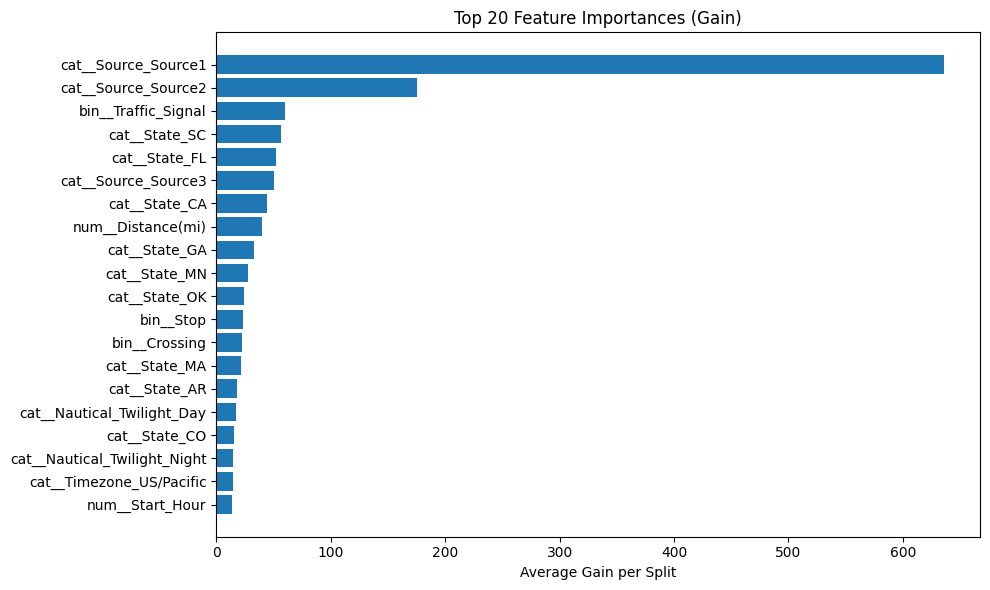

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 如果你剛剛的 pipeline 存在於變數 clf（或在磁碟裡，可用 joblib 載）
# 這段程式碼會自動抓出「真正進模型」的特徵名稱與 gain 重要度，畫出長條圖。

# 1. 自動尋找 feature-selection 步驟名稱（可能叫 select / fs / selectfrommodel …）
selector_name = next(
    (name for name, step in clf.steps if hasattr(step, 'get_support')),
    None
)

if selector_name is None:
    raise RuntimeError("Pipeline 裡找不到 feature-selection 步驟。")

selector = clf.named_steps[selector_name]
mask = selector.get_support()                           # True / False array
feat_all = clf.named_steps['prep'].get_feature_names_out()
feat_used = feat_all[mask]                              # 真正進模型的特徵

# 2. 從 XGBoost booster 取 gain 重要度（dict: {'f0':val0, 'f1':val1, ...}）
booster = clf.named_steps['model'].get_booster()
imp_gain_dict = booster.get_score(importance_type='gain')

# 3. 轉成 numpy array，跟特徵索引對應
imp_gain = np.zeros(len(feat_used))
for k, v in imp_gain_dict.items():
    idx = int(k[1:])        # 'f27' ➜ 27
    if idx < len(imp_gain): # 保險檢查
        imp_gain[idx] = v

# 4. DataFrame 排序，方便觀看 & 做圖
imp_df = (pd.DataFrame({'Feature': feat_used, 'Gain': imp_gain})
            .sort_values('Gain', ascending=False)
            .reset_index(drop=True))

# 5. 顯示一下維度資訊
print(f"原始特徵維度：{len(feat_all)}")
print(f"篩選後維度：{len(feat_used)}")

# 6. 畫 Top-20 bar chart
topk = 20
plt.figure(figsize=(10, 6))
plt.barh(imp_df['Feature'][:topk][::-1], imp_df['Gain'][:topk][::-1])
plt.xlabel("Average Gain per Split")
plt.title(f"Top {topk} Feature Importances (Gain)")
plt.tight_layout()
plt.show()
